<a href="https://colab.research.google.com/github/Nmarinsiruela/Curso-ML-Python/blob/master/NMS_2_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2 - Regresión Lineal

*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*

## 0. Carga de dataset y librerías.

Como se explicó en el anterior punto, la librería Sklearn contiene varios datasets interesantes, ampliamente conocidos y utilizados para entrenar y aprender. En este caso, se utilizará el Boston Housing Dataset. Debido a lo ampliamente conocido que es, existe la función load_boston, que directamente cargará los datos. En caso de usar otros datasets, este paso será necesario hacerlo manualmente.

In [0]:
from sklearn.datasets import load_boston
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [0]:
boston_dataset = load_boston()

# El atributo DESCR contiene una descripción del dataset, indicando el nº de filas y columnas,
# el identificador de cada columna, etc.

# print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

# n = número de ejemplos que se disponen de los datos y
# p = número de características que se disponen de los datos.

n, p = X.shape

## 1. Análisis exploratorio inicial.

Este ejercicio se basará en modelar la relación existente entre las variables **RM** (Número medio de habitaciones) y **MEDV** (Valor medio de la vivienda). Como debe de ser ya costumbre, se debe primero comenzar entendiendo la naturaleza de los datos, realizando un análisis exploratorio preliminar. Esto es, se hace uso de herramientas estadísticas y matemáticas para obtener una mejor imagen de lo que los datos representan.

---

Realizar un análisis exploratorio en el que se responda a las siguientes preguntas:


1.  **¿Existe algún relación entre la variable RM y MEDV?** Demostrar la existencia de dicha relación desde dos vertientes diferentes: un *scatter plot* con cada variable en un eje que permita visualizar algún patrón identificable. También, obtener una medida estadística como la correlación entre dos variables para comprobar cuantitativamente dicha relación. ¿Son coherentes ambos análisis? ¿Es coherente con lo que se puede esperar de manera intuitiva?

2.   **¿Cúal es el precio medio de las viviendas cuyo número medio de habitaciones oscila entre 5 y 6?** Aquí es posible apoyarse en la función ***np.logical_and()*** para combinar dos condiciones diferentes.

3. **¿Hay algún fenómeno anómalo en la distribución de los datos?** Realizar un histograma para la variable MEDV. Aquí se recomienda utilizar un valor elevado de *bins*, por encima de 100, para remarcar el efecto de la anomalía. ¿De qué se trata?

**Consejo:** Cuando al hacer un *scatter plot* haya una gran acumulación de puntos en una zona de la gráfica que no permita identificar la densidad de puntos que hay, es una buena idea añadir algo de transparencia al color de dichos puntos. Esto se consigue con el atributo ***alpha*** de la función*** plot()***

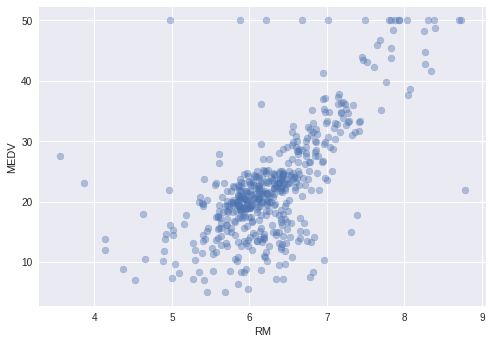

Correlation:  0.6953599470715394
Average price: 17.4873417721519


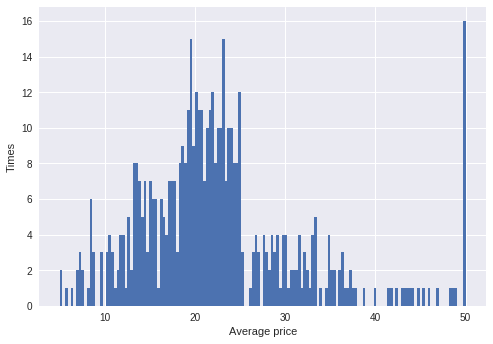

In [0]:
# 1

rm_index = 5
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.scatter(X[:,5:6], Y, alpha=0.4)
plt.show()
print("Correlation: ", sc.stats.linregress(X[:,5],Y).rvalue)

# 2

# Se buscan los valores de X que se encuentren en el rango buscado, y de estos se hace la media en Y.
print("Average price:", np.mean(Y[np.logical_and(X[:,5] >=5, X[:,5] <=6)]))


# 3

plt.xlabel("Average price")
plt.ylabel("Times")
plt.hist(Y, bins=150)
plt.show()

# Puede verse que se han cortado los precios superiores a 50000 a este valor, fijando un tope.

## 2. Regresión Lineal Simple - Mínimos Cuadrados Ordinarios.

Una vez realizado el análisis exploratorio inicial, se puede implementar y entrenar el modelo. Se puede conseguir ajustar a los datos la recta de regresión lineal haciendo uso de aquellos valores de los parámetros obtenidos mediante el método de ***Mínimos Cuadrados Ordinarios***. Este método encuentra que el mínimo de la función del ***Error Cuadrático Medio*** se encuentra en el punto donde su derivada es igual a 0. Esto se obtiene evaluando la siguiente expresión:

> > > > >  > > > $W = (X^TX)^{-1}X^TY$

Para trabajar de forma vectorizada, se amplía la matriz $X$ con una primera columna de valores asignados a $1$, que servirán para mantener al termino independiente.

**Recuerda:** Esto es posible hacerlo de esta manera puesto que se trabaja con una función lineal. Hay otros métodos para casos más complejos!

---

1.   Ajustar el modelo de Regresión Lineal mediante el método de ***Mínimos Cuadrados Ordinarios***.
2.   Visualizar la recta obtenida para comprobar que realmente se ajusta a la nube de puntos.
3.   Explicar cómo se interpretan intuitivamente los valores de cada uno de los parámetros. ¿Qué representa $w_0$?¿Y $w_1$?
4.   Utilizar el modelo entrenado para predecir cuál será el valor medio de la vivienda para un número medio de ***9 habitaciones***, y también el número de habitaciones medio que podría tener una vivienda cuyo valor medio es de **45.000\$**.
5.   Utilizar el modelo entrenado para calcular, para cada valor de $X$, cual es el valor predicho por la regresión. Se llamará al vector generado el vector de salida predicho $Y_P$. Ahora, se procede a evaluar la calidad de las predicciones implementando una función que recibe como parámetros el vector de valores de salida reales $Y$ y el vector de salida predicho $Y_P$, y computa el ***Error Cuadrático Medio***. El ***ECM*** se calcula como:

> > > > >  > > >  $ \operatorname{ECM}=\frac{1}{n}\sum_{i=1}^n(Y_{Pi} - Y_i)^2. $

**Hint:** Se puede utilizar la @ como un operador equivalente a la función **np.matmul()**, utilizada para la multiplicación matricial. ej : A = B @ C

**Consejo:** Al trabajar con multiplicación de matrices y vectores, es útil comprobar que los vectores tengan bien definidas sus dos dimensiones. Esto se puede ver usando con el atributo *X.shape* de dicho vector. Se busca que sus dimensiones se muestren así **(5, 1)** y no así **(5,)**.
En esos casos se puede evitar seleccionando dicha columna así **X[:, 3:4]** en vez de así **X[:, 3]**. Igualmente, en caso de haber perdido una de las dimensiones, las funciones **np.newaxis()** o **reshape()** pueden ser de ayuda.

```
ej: Y = Y[:, np.newaxis]
```
**Info:** En el punto 5 se ha calculado el error del modelo utilizando todos los datos. Más adelante se verá que esto no es del todo correcto a la hora de evaluar un modelo, pero de momento es suficiente.


Ejercicio 1
W [[-34.67062078]
 [  9.10210898]]
Ejercicio 2


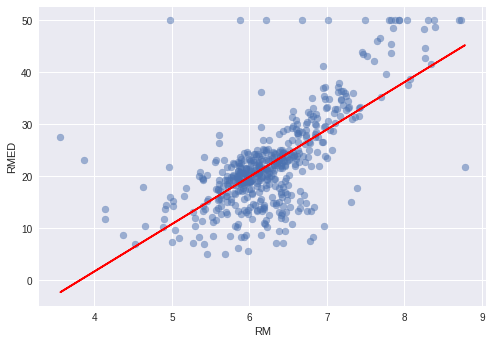

Ejercicio 4
Average price for 9 rooms: [47.24836005]
Average rooms for 45000$ [8.75298471]
Ejercicio 5
ECM: 43.600551771169556


In [0]:
# COMIENZA TU CÓDIGO AQUÍ 

# 1

print("Ejercicio 1")
# Se obtienen los vectores individuales, con las dimensiones correctas.
Ysel = Y[:, np.newaxis]
Xsel = X[:,5:6]

# Se amplía la matriz con el vector de unos.
Xsel = np.hstack((np.ones((n,1)), Xsel))

W = np.linalg.inv(Xsel.T @ Xsel) @ Xsel.T @ Ysel

print("W",W)

# 2 
print("Ejercicio 2")

y_p = W[0] + W[1]*X[:,5]
plt.xlabel("RM")
plt.ylabel("RMED")
plt.scatter(X[:,5], Ysel, alpha=0.5)
plt.plot(X[:,5], y_p, "r")
plt.show()

# 3 
# W1 representa el salto de precio de nº de habitación cuando incrementas un m2
# W0 representa el 'precio' si quieres vender una casa con 0 m2 -> No tiene 
# sentido intuitivo.

# 4
print("Ejercicio 4")
print("Average price for 9 rooms:", W[0] + W[1]*9)
print("Average rooms for 45000$", (45.0 - W[0])/W[1])

# 5
print("Ejercicio 5")
y_p = y_p[:, np.newaxis]
ecm = (1/n) * np.sum((y_p - Ysel)**2)

print("ECM:",ecm)




## 3. Regresión Lineal Simple - Librería Sklearn.

*[Realizar primero el ejercicio número #2]*

En el ejercicio anterior se ha aprendido como realizar de forma práctica el modelo de ***Regresión Lineal Simple***. En el día a día, sin embargo, es necesario ser efectivo, por lo que lo habitual será emplear librerías que ya implementen estos modelos. ***Sklearn***, por ejemplo, implementa muchos de los modelos de Machine Learning, como el de Regresión Lineal.
 

---

1. Hacer uso de la función ***sklearn.linear_model.LinearRegression()*** para entrenar un modelo de Regresión Lineal Simple con las mismas variables del ejercicio anterior. Utilizar la documentación (online o usando el comando "?") para estudiar los diferentes parámetros que acepta este modelo. 

2. Una vez esté ajustado el modelo, comprobar que el valor de los parámetros obtenidos (también llamados coeficientes) sea el mismo que se ha obtenido anteriormente. De la misma forma, utilizar la función ***.predict()***, que ya viene implementada, para comprobar que las predicciones anteriores eran correctas. 

Finalmente, comprobar que el valor del Error Cuadrático Medio que has obtenido previamente en el ejercicio anterior es igual al que proporciona la función ya implementada ***sklearn.metrics.mean_squared_error()***. 


No handles with labels found to put in legend.


W0: -34.67062077643857
W1: 9.10210898118031
Average price for 9 rooms: 47.24836005418422
Average rooms for 45000$: 8.752984713890706
ECM 43.60055177116956


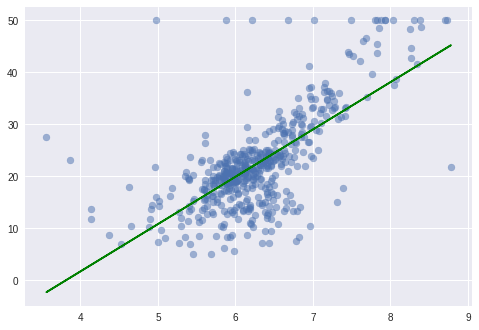

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

Ysel = Y[:, np.newaxis]
Xsel = X[:,5:6]

# 1

model = linear_model.LinearRegression()
model.fit(Xsel, Ysel)

# 2
w0_model = model.intercept_[0]
w1_model = model.coef_[0][0]
print("W0:",w0_model)
print("W1:",w1_model)
array_9 = np.array([9]).reshape(-1,1)
print("Average price for 9 rooms:",model.predict(array_9)[0][0])
print("Average rooms for 45000$:",(45.0 - w0_model)/w1_model)
print("ECM",mean_squared_error(Ysel, model.predict(Xsel)))


plt.scatter(Xsel, Ysel, alpha=0.5)
plt.plot(Xsel, model.predict(Xsel), "g")
plt.show()




## 4. Regresión Lineal Múltiple - Librería Sklearn.

Por último, se puede generalizar el modelo de Regresión Lineal Simple añadiendo más variables y obteniendo así el modelo de Regresión Lineal Múltiple. Al añadir más variables al modelo, se le dota de más información que ayude a mejorar las predicciones. Por ejemplo, un modelo de Regresión Lineal Simple podría intentar predecir la altura de una persona en base al tamaño de la mano. Pero si se añadiera otra variable, como por ejemplo, el género, podría haber más información para hacer predicciones más fidedignas.

La buena noticia es que a nivel de código, no hay gran diferencia entre ambos modelos, que también pueden ser resueltos mediante el método de ***Mínimos Cuadrados Ordinarios*** evaluando la expresión ya conocida:

> > > > >  > > > $W = (X^TX)^{-1}X^TY$

---

1. Realizar un modelo de Regresión Lineal Múltiple dónde se utilicen las variables ** RM** (Número medio de habitaciones), **LSTAT ** (Porcentaje de población en el barrio clasificada como clase baja) y **PTRATIO** (Ratio de alumno-profesor del barrio).

2. Observar el valor de los coeficientes e interpretarlos.

3. Utilizar el modelo de Regresión Lineal implementado por la librería **Sklearn** para entrenar este mismo modelo y comprobar que los coeficientes obtenidos son correctos.

4. Evaluar el modelo utilizando la función  ***sklearn.metrics.mean_squared_error()***.  y comparar el valor del error obtenido en el ejercicio 2 con el Modelo de Regresión Lineal Simple. ¿El error es mayor o menor? ¿Por qué ocurre esto? --> Esta vez, solo se evalúa el ECM de una serie de variables, y no de todas a la vez.


**Hint**  Se puede reutilizar mucho  código de los ejercicios anteriores.

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# RM: 5, LSTAT: 12, PTRATIO: 10

Ysel = Y[:, np.newaxis]
Xsel = X[:,[5, 10, 12]]

# 1

Xselmanual = np.hstack((np.ones((n,1)), Xsel))

W = np.linalg.inv(Xselmanual.T @ Xselmanual) @ Xselmanual.T @ Ysel

# 2
print("Wmanual",W.T[0])

# 3
model = linear_model.LinearRegression()
model.fit(Xsel, Ysel)
w0_model = model.intercept_
w1_model = model.coef_
print("Wsklearn:",w0_model[0],w1_model[0])

# 4
print("ECM_sklearn",mean_squared_error(Ysel, model.predict(Xsel)))

Wmanual [18.56711151  4.51542094 -0.93072256 -0.57180569]
Wsklearn: 18.567111505395218 [ 4.51542094 -0.93072256 -0.57180569]
ECM_sklearn 27.13040575849706
